# Final Project

Jacob Gordon

RedID 824652862

CS 696

This project is using the New York City Airbnb dataset that provides Airbnb listings and metrics from kaggle. Full dataset: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/data.

We also look at rat sightings from NYC. Full dataset: https://www.kaggle.com/new-york-city/nyc-rat-sightings

For this project I used pandas for data manipulation and vaex for most of the graphs and visualizations.

With these datasets, I answered the following questions:
1. If looking to buy a property to run an Airbnb, which neighborhood has the highest profit potential?
2. What type of room is most profitable?
3. Does pricing have a corrilation with renter feedback?
4. What neighbourhoods have the most rat sightings?
5. How does profitability and rat sightings compare?

Answering these questions would help a potential property invester who is new to New York City make their decision on where to focus their search for a property investment.

1. First lets determine which neighborhood has the highest potential profitablility.

INFO:MainThread:numexpr.utils:NumExpr defaulting to 4 threads.


location
Financial District, Manhattan    43403.950617
Theater District, Manhattan      40811.926471
Murray Hill, Manhattan           36745.214894
Tribeca, Manhattan               36279.646259
Midtown, Manhattan               36158.224911
Flatiron District, Manhattan     32928.845070
NoHo, Manhattan                  28567.253333
Spuyten Duyvil, Bronx            28028.750000
Hell's Kitchen, Manhattan        26603.217414
DUMBO, Brooklyn                  25718.111111
Name: profit_potential, dtype: float64


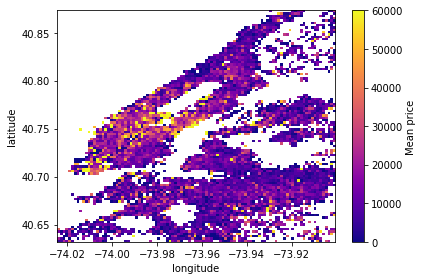

In [1]:
import vaex
import pandas as pd
import numpy as np

df_air = pd.read_csv('AB_NYC_2019.csv')
df_rats = pd.read_csv('Rat_Sightings.csv')

long_min = -74.05
long_max = -73.90
lat_min = 40.63
lat_max = 40.90

df_filtered_air = df_air[(df_air.longitude > long_min) & (df_air.longitude < long_max) & (df_air.latitude > lat_min) & (df_air.latitude < lat_max)]
df_filtered_air = df_filtered_air[(df_filtered_air.price > 0) & (df_filtered_air.price < 600)]
df_filtered_air['profit_potential'] = df_filtered_air['price'] * df_filtered_air['availability_365']
df_filtered_air['location'] = df_filtered_air['neighbourhood'] + ', ' + df_filtered_air['neighbourhood_group']

mean_profits = df_filtered_air.groupby('location')['profit_potential'].mean()
mean_profits.sort_values(ascending=False, inplace=True)
print(mean_profits.head(10))

vaex_air = vaex.from_pandas(df_filtered_air)
vaex_air.plot('longitude', 'latitude', what='mean(profit_potential)', colormap='plasma', shape=100, colorbar_label='Mean price', vmin=0, vmax=60000)


Based on this we see that Manhattan has the highest earning potential of all the boroughs, undoubtably due to it's proximity to tourist attractions. Our profitability calculations do not factor in the average cost of purchasing a property in the area, but as far as possible rent price and days available, Manhattan holds 8 out of the top 10 most profitable neighborhoods.

2.
Next we want to determine how profitable different room types are. This plays into our purchasing decision because if private rooms are profitable, this means that we could live at the property while it is rented out, increasing the amount of days it is available to rent and allowing us to save on potentially not needing another property to live at. 


In [2]:
room_profits = df_filtered_air.groupby('room_type')['profit_potential'].mean()
mean_profits.sort_values(ascending=False, inplace=True)
room_profits

room_type
Entire home/apt    21877.457971
Private room        9465.828340
Shared room         9423.234649
Name: profit_potential, dtype: float64

Unfortunately we see that entire home/apt has an average earning potential of over double of private or shared rooms. Although private and shared rooms are still profitable, in order to maximize our potential profit this means we must own a seperate property to live in while renting out the apartment, eating into potential profits. 

3. Now to determine if pricing has a correlation with renter feedback. We are not concerned with the type of feedback, i.e. good or bad, just the frequency of which it is recieved. We're going to look at minimum price per reservation for this, so the per night rate will be multiplied by the minimum nights.

neighbourhood_group
Manhattan        180.071596
Brooklyn         121.529823
Queens            95.783683
Staten Island     89.964968
Bronx             79.649886
Name: price, dtype: float64
neighbourhood_group
Queens           0.022825
Bronx            0.020515
Staten Island    0.018840
Brooklyn         0.009503
Manhattan        0.006743
Name: feedback_ratio, dtype: float64


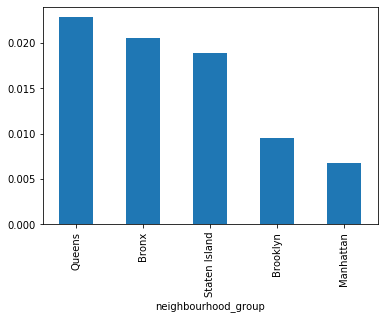

In [3]:
df_air_2 = df_air
df_air_2['min_reservations'] = df_air['price'] * df_air['minimum_nights']
df_air_2['feedback_ratio'] = df_air_2['reviews_per_month'] / df_air_2['min_reservations']
df_air_2 = df_air_2.replace([np.inf, -np.inf], np.nan)
df_air_2 = df_air_2.dropna()

average_price = df_air_2.groupby('neighbourhood_group')['price'].mean()
average_price.sort_values(ascending=False, inplace=True)
print(average_price)

feedback = df_air_2.groupby('neighbourhood_group')['feedback_ratio'].mean()
feedback.sort_values(ascending=False, inplace=True)
print(feedback)
ax = feedback.plot.bar()

Lets look closer at Queens, the Bronx, and Staten Island.

In [4]:
ratio = df_air_2[(df_air_2.neighbourhood_group != 'Manhattan') & (df_air_2.neighbourhood_group != 'Brooklyn')]
ratio['location'] = ratio['neighbourhood'] + ', ' + ratio['neighbourhood_group']

ratio_hoods = ratio.groupby('location')['feedback_ratio'].mean()
ratio_hoods.sort_values(ascending=False, inplace=True)
print(ratio_hoods.head(20))

location
New Dorp Beach, Staten Island     0.128222
East Elmhurst, Queens             0.080050
Whitestone, Queens                0.069439
Springfield Gardens, Queens       0.059581
Bull's Head, Staten Island        0.057103
Woodlawn, Bronx                   0.052118
Jamaica, Queens                   0.049697
Schuylerville, Bronx              0.044587
New Springville, Staten Island    0.040534
Rosedale, Queens                  0.039792
Randall Manor, Staten Island      0.038660
Corona, Queens                    0.037552
South Ozone Park, Queens          0.037211
Port Morris, Bronx                0.036986
Fresh Meadows, Queens             0.036407
Richmond Hill, Queens             0.036111
Queens Village, Queens            0.033918
Mariners Harbor, Staten Island    0.032891
St. Albans, Queens                0.032577
Bayside, Queens                   0.032138
Name: feedback_ratio, dtype: float64


C:\Users\jacwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Analyzing this data is a little tricky due to Manhatten and Brooklyn having such high prices causing their ratios to be low. But we can see that Queens has the highest ratio of reveiws to price despite having the 3rd highest average fare. This could be for a range of factors that we can't possibly know based on the data provided. We are going to investigate a theory that rat sightings has a direct affect on the data regarding Airbnb listings.

4. What neighborhoods have the most rat sightings?

In [5]:
df_rats['Borough'] = df_rats['Borough'].str.capitalize()
rats_series = df_rats['Borough'].value_counts()
rats_series

Brooklyn         34673
Manhattan        26803
Bronx            20706
Queens           14811
Staten island     4920
Unspecified          1
Name: Borough, dtype: int64

This makes sense given that Staten Island has the lowest population of the 5 boroughs. These numbers don't follow population perfectly entirely however as Brooklyn and Queens has similar populations but Brooklyn recieved double the rat sightings as Queens did.

5. How does profitability and rat sightings compare?

In [6]:
profitability = df_filtered_air.groupby('neighbourhood_group')['profit_potential'].mean()
profitability

neighbourhood_group
Bronx        12800.343612
Brooklyn     11887.829522
Manhattan    20352.116561
Queens       11922.054717
Name: profit_potential, dtype: float64

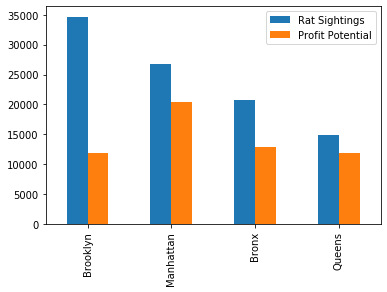

In [7]:
compare = pd.concat([rats_series, profitability], axis=1)
compare.dropna(inplace=True)
compare = compare.rename(columns={"Borough": "Rat Sightings", "profit_potential": "Profit Potential"})
compare.plot(y=["Rat Sightings", "Profit Potential"], kind="bar")

The results here are very interesting, specifically in Brooklyn. Manhattan, the Bronx, and Queens don't seem to show much of a correlation between profit potential and rat sightings, but Brooklyn has the highest rat sightings and the lowest profit potential. If we recall, Brooklyn also had the second highest average price per reservation of the 5 boroughs. So with the high prices and the seemily large rat population, Brooklyn may not be the most desirable location for Airbnb customers, therefore a poor property purchase location.

Lets look closer at Brooklyn.

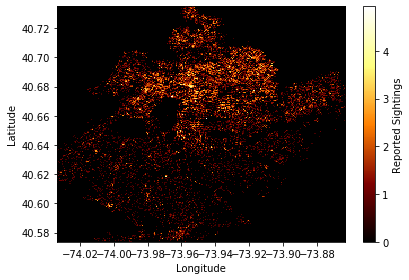

In [12]:
brooklyn_rats = df_rats.loc[df_rats['Borough'] == 'Brooklyn']
brooklyn_rats

vaex_rats = vaex.from_pandas(brooklyn_rats)
vaex_rats.plot('Longitude', 'Latitude', what='count(*)', f='log1p', shape=256, colorbar_label='Reported Sightings')

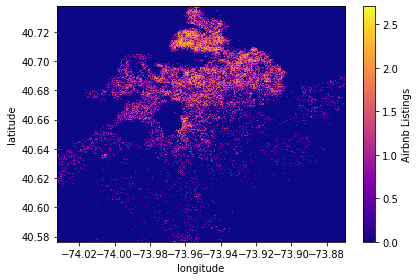

In [17]:
df_brooklyn = df_air.loc[df_air['neighbourhood_group'] == 'Brooklyn']
vaex_brooklyn = vaex.from_pandas(df_brooklyn)
vaex_brooklyn.plot('longitude', 'latitude', what='count(*)', f='log1p', colormap='plasma', shape=256, colorbar_label='Airbnb Listings')

We can see here that many of the Airbnb listings are in similar areas that rat sightings occur. Now lets look at how profit potential compares in these areas.

C:\Users\jacwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


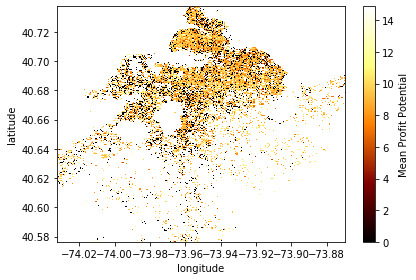

In [23]:
df_brooklyn['profit_potential'] = df_brooklyn['price'] * df_brooklyn['availability_365']
vaex_brooklyn_profit = vaex.from_pandas(df_brooklyn)
vaex_brooklyn_profit.plot('longitude', 'latitude', what='mean(profit_potential)', shape=256, f='log1p', colorbar_label='Mean Profit Potential')

Looking at profit potential compared with rat sightings does not seem to suggest a correlation between the two. Another possibility to look at is the light correlation seen between Airbnb locations and rat sightings could simply be due to the fact that the northern section of Brooklyn is more populated.

# Final Thoughts and Results

Unfortunately the results found from running the analysis aren't as conclusive as I would have hoped. For starters, there was little to no correlation to Airbnb success, based on my deteremination of profit, and rat sightings. As long as the rat is not spotted within the Airbnb itself, I'd assume renters have little concern with rat sightings. Maybe it could be part of the experience of NYC for some tourists even!
Secondly, based on the data provided in the Airbnb dataset, I wasn't able to determine with confidence the best borough to start an Airbnb in. Manhattan had the highest reservation prices, allowing for more money coming in but would be heavily offset by the price of buying the property to begin with. Unfortunately this data is not provided otherwise I believe finding the true profit potential would have been much easier and a much more confident conclusion could have been reached. Of the analysis done, Brooklyn would seemed to be the least desirable borough due to it's low profit potential and high rat sightings. But again, this is determined without knowing cost of purchasing the properties, which is a huge metric to not have in determining overall profit potential. Based on my analysis, the best property for profit would be renting the entire apartment instead of just a room, and location being in the following boroughs in order from best to worst: Manhatten, Bronx, Queens, Brooklyn, and Staten Island. Staten Island comes in last mostly due to lack of data in both datasets to make a confident determination.